# Problem 3.5

## Part a

$ \begin{bmatrix} x+y \\ x-2y \\ 2z \end{bmatrix} = \begin{bmatrix} 1 \\ 3.14 \\ 2.71 \end{bmatrix}$

Solving analytically, we see that the last equation dictates:

$2z = 2.71$

$z = 1.355$

Subtracting the second equation from the first, we get:

$3y = -2.14$

$y = -0.7133$

And back-substituting in for x we get:

$x=1-y = 1+0.7133 = 1.7133$


This system can also be written as a matrix equation:

$ \begin{bmatrix} 1&1&0\\ 1&-2&0 \\ 0&0&2 \end{bmatrix}  \begin{bmatrix} x \\ y \\ z \end{bmatrix}= \begin{bmatrix} 1 \\ 3.14 \\ 2.71 \end{bmatrix}$

So therefore:

$ \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} 1&1&0\\ 1&-2&0 \\ 0&0&2 \end{bmatrix}^{-1}   \begin{bmatrix} 1 \\ 3.14 \\ 2.71 \end{bmatrix}$

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d as interp
%matplotlib inline

In [2]:
A = np.array([[1,1,0], [1,-2,0], [0,0,2]])
b = np.array([[1], [3.14], [2.71]])
x = np.dot(np.linalg.inv(A),b)
print('x = %.3f' % x[0])
print('y = %.3f' % x[1])
print('z = %.3f' % x[2])

x = 1.713
y = -0.713
z = 1.355


## Part b

In [16]:
a = np.loadtxt('responsecurves.csv',delimiter=",")
lambdas = a[:,0]
S_L = a[:,1]
S_M = a[:,2]
S_S = a[:,3]

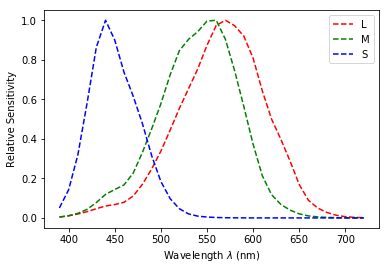

In [18]:
plt.figure()
plt.plot(lambdas, S_L, 'r--')
plt.plot(lambdas, S_M, 'g--')
plt.plot(lambdas, S_S, 'b--')
plt.legend(["L", "M", "S"])
plt.xlabel(r'Wavelength $\lambda$ (nm)')
plt.ylabel('Relative Sensitivity')
plt.show()

In [31]:
Si= [interp(lambdas, S_L, kind='quadratic'), 
     interp(lambdas,S_M, kind='quadratic'), 
     interp(lambdas, S_S, kind='quadratic')]

# for monochromatic light
# takes in wavelength and returns 3 d projection using sensitivity functions
def B_func(wave):
    return np.array([Si[0](wave), Si[1](wave), Si[2](wave)])

# B matrix
# B(i) = projection of basis light i onto 3 dimensional space
J1 = 645
J2 = 526
J3 = 444
B_matrix = np.array([B_func(J1), B_func(J2), B_func(J3)]).transpose()


# linear equation beta = B x
# x = inv(B) beta
def target_match(target):
    beta = B_func(target)
    return np.dot(np.linalg.inv(B_matrix), beta)



target_light = 560
x = target_match(target_light)
print('%.4f J1' % x[0])
print('%.4f J2' % x[1])
print('%.4f J3' % x[2])

1.3493 J1
1.0896 J2
-0.0294 J3


## Part c

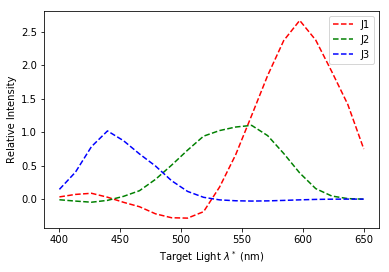

In [33]:
targets = np.linspace(400,650,20)
J1_curves = []
J2_curves = []
J3_curves = []
for t in targets:
    x = target_match(t)
    J1_curves.append(x[0])
    J2_curves.append(x[1])
    J3_curves.append(x[2])

plt.figure()
plt.plot(targets, J1_curves, 'r--')
plt.plot(targets, J2_curves, 'g--')
plt.plot(targets, J3_curves, 'b--')
plt.xlabel(r'Target Light $\lambda^*$ (nm)')
plt.ylabel('Relative Intensity')
plt.legend(["J1","J2", "J3"])
plt.show()

## Part d

In [43]:
# find where J1 has negative value (only J1 has negative values as per the graph above)
negatives = np.array(targets)[np.where(np.array(J1_curves)<-.05)]
print('%d - %d nm Cannot be Matched' % (negatives[0], negatives[-1]))

465 - 518 nm Cannot be Matched


## Part e

By adding white light, we are changing the projection of each target light $ \beta^*_i = \pi(J^*)$ to include the full integral and not just the collapsed version with only monochromatic light. If you make the beta values large enough,given unchanging standard lights, you can ensure that all values of $\xi$ are positive in the matrix equation $B~\overrightarrow{\xi}=\overrightarrow{\beta^*}$

# Problem 4.3

We can define the two paths (geometrically) to any point on the screen with position $x$, assuming slit spacing $p$ and distance $d$:

$L1 = \sqrt{(x- \frac{p}{2})^2 + d^2}$

$L2 = \sqrt{(x+ \frac{p}{2})^2 + d^2}$

Given those two paths, we sum the contribution of each of those paths:


$\psi(x) = e^{\dfrac{2i}{\lambda} L1} + e^{\dfrac{2i}{\lambda} L2}$

$\psi(x) = e^{\dfrac{i \sqrt{(x- \frac{p}{2})^2 + d^2}}{\lambda} } + e^{\dfrac{i \sqrt{(x+ \frac{p}{2})^2 + d^2}}{\lambda} }$

Pulling out a factor of $d^2$, we get:

$\psi(x) = e^{\frac{2i ~ d \sqrt{(\frac{x-.5p}{d})^2 + 1}}{\lambda} } + e^{\frac{2i~d \sqrt{(\frac{x+.5p}{d})^2 + 1}}{\lambda} }$

Using Taylor Approximations, we can approximate that:

$\psi(x) = e^{\frac{2i ~d  (1+.5(\frac{x^2+px+.25p^2}{d^2}))}{\lambda}   } + e^{\frac{2i ~d  (1+.5(\frac{x^2-px+.25p^2}{d^2}))}{\lambda}   }$


$\psi(x) = e^{\frac{2id}{\lambda}}~e^{\frac{ix^2}{d \lambda}}~e^{\frac{ip^2}{4d\lambda}}(e^{\frac{i}{d\lambda}px}+ e^{\frac{-i}{d\lambda}px})$

$\psi(x) = e^{\frac{2id}{\lambda}}~e^{\frac{ix^2}{d \lambda}}~e^{\frac{ip^2}{4d\lambda}}2cos(\frac{px}{d\lambda})$

$|\psi(x)|^2 = 1 * (2cos(\frac{px}{d\lambda}))^2$

$|\psi(x)|^2 = 4~cos^2(\frac{px}{d\lambda})$

The bright lines will be when the $cos^2(\omega) = 1$, meaning when $\omega = n\pi$

$\frac{px}{d\lambda} = n\pi$

Plugging in the numbers for p, d, and $\lambda$ given in problem 4.3:

$57.87x = n$ (for x in meters, n being integers 0,1,..)

This leads to spacing of $\frac{1}{57.87} = .017$ meters between bright lines